In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from math import floor, ceil, cos, sin

Question 1
---------------
1. Download Lena image and 2D-DFT of the image and call it as F1. For the same Lena image use 1D-DFT along each row and column ( as discussed in the class ) and call the resultant image as F2. Display the IFT(F1) and IFT(F2) and verify whether both are same or not. 

Are they same? True


Text(0.5, 1.0, '1d-fft twice')

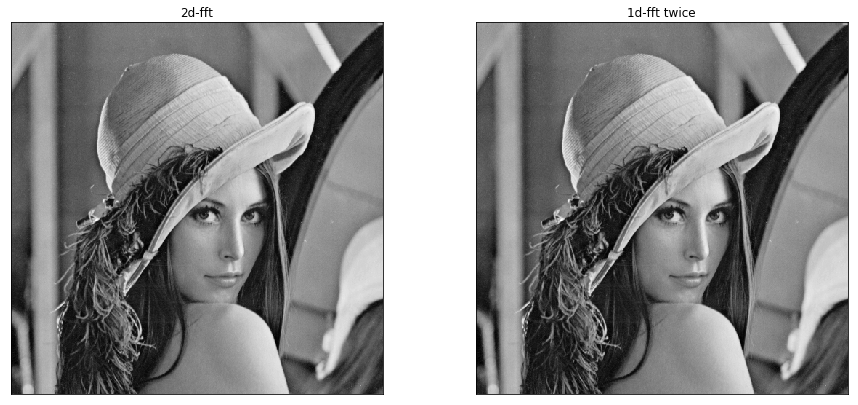

In [2]:
lena = mpimg.imread('../img/lena_gray.png')
# 2d fft
f1 = np.fft.fft2(lena)

# 1d fft twice
partial = np.fft.fft(lena, axis=1)
f2 = np.fft.fft(partial, axis=0)

# ift
if1 = np.fft.ifft2(f1)
if2 = np.fft.ifft2(f2)
print(f'Are they same? {np.all(if1==if2)}')

fig, ax = plt.subplots(1, 2, figsize=(15,15),
 subplot_kw={'aspect':'equal', 'xticklabels':[], 'yticklabels':[], 'xticks': [], 'yticks': []}, 
 gridspec_kw = {'wspace':0.25, 'hspace':0.25})
ax[0].imshow(np.real(if1), cmap='gray')
ax[0].set_title('2d-fft')
ax[1].imshow(np.real(if2), cmap='gray')
ax[1].set_title('1d-fft twice')

Question 3
---------------
Synthesize a matrix with size 200 x 200 with 100's in the middle half of the image and 0's elsewhere. Call this matrix as image F. Find the following projections:
- Row
- Column
- Diagonal, 450
- Diagonal, 1350
    
Reconstruct using Back Projection in all the above directions and observe the resultant reconstructed image.

Text(0.5, 1.0, 'Reconstructed Image')

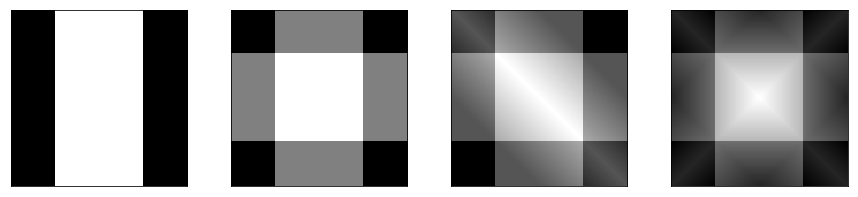

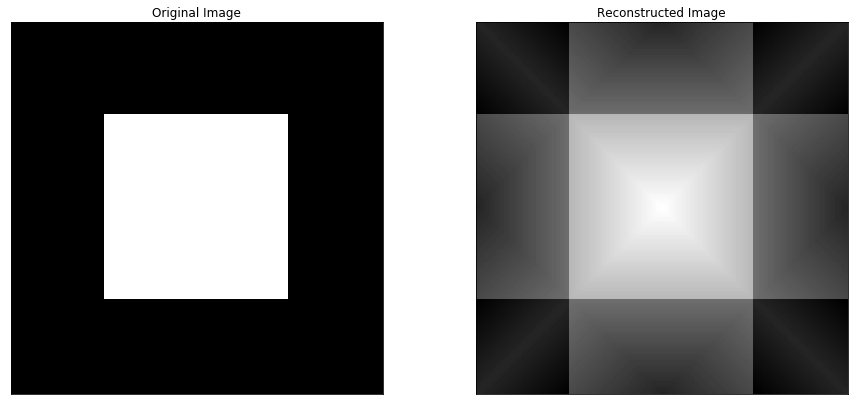

In [3]:
img = np.zeros((200,200))
img[50:149,50:149] = 100

row_projection = img.sum(axis=1)
col_projection = img.sum(axis=0)

#diagonal projection 1
#exploit symmetry of the matrix
major_diag_projection_half = np.zeros(200)
for ix, iy in np.ndindex(img.shape):
    if ix > iy:
        continue
    else:
        major_diag_projection_half[iy-ix] += img[ix, iy]
flipped = np.flip(major_diag_projection_half[1:])
major_diag_proj = np.concatenate([flipped, major_diag_projection_half]) 

#diagonal projection 2
#exploit symmetry of the matrix
minor_diag_projection_half = np.zeros(200)
for ix, iy in np.ndindex(img.shape):
    if (ix + iy) > 199:
        continue
    else:
        minor_diag_projection_half[ix+iy] += img[ix, iy]
flipped = np.flip(minor_diag_projection_half[:-1])
minor_diag_proj = np.concatenate([minor_diag_projection_half, flipped]) 

fig, ax = plt.subplots(1, 4, figsize=(15,15),
 subplot_kw={'aspect':'equal', 'xticklabels':[], 'yticklabels':[], 'xticks': [], 'yticks': []}, 
 gridspec_kw = {'wspace':0.25, 'hspace':0.25})
# Backpropagation
re_img = np.zeros(img.shape)
# row direction
for i in range(200):
    re_img[i,:] += row_projection
    
ax[0].imshow(re_img, cmap='gray')
# col direction
for j in range(200):
    re_img[:,j] += col_projection
ax[1].imshow(re_img, cmap='gray')
# diag direction 1
for ix, iy in np.ndindex(re_img.shape):
    diff = abs(ix-iy)
    re_img[ix, iy] += major_diag_projection_half[diff] # using hack here
ax[2].imshow(re_img, cmap='gray')
# diag direction 2
for ix, iy in np.ndindex(re_img.shape):
    index = (ix+iy)%200
    if ix+iy <= 199:
        re_img[ix, iy] += minor_diag_projection_half[index] # using hack here
    else:
        re_img[ix, iy] += flipped[index] # using hack here
ax[3].imshow(re_img, cmap='gray')
        
fig, ax = plt.subplots(1, 2, figsize=(15,15),
 subplot_kw={'aspect':'equal', 'xticklabels':[], 'yticklabels':[], 'xticks': [], 'yticks': []}, 
 gridspec_kw = {'wspace':0.25, 'hspace':0.25})
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(re_img, cmap='gray')
ax[1].set_title('Reconstructed Image')

Question 4
---------------
Download a color Lena image and find the R, G, B components of the image and do the histogram equalization in each of the plane (R, G, B) and display the processed RGB color image.

In [4]:
# helper functions
# healper functions
def histeq(img):
    '''Performs histogram equalization on the given image
    img : Image data to perform histogram equalization on
    img is a single channel grayscale image with values from 0 to 255
    '''
    intensity_count_hist1 = np.zeros(256)
    for ix, iy in np.ndindex(img.shape):
        intensity_count_hist1[int(img[ix, iy])] += 1
    
    normalized = intensity_count_hist1/np.sum(intensity_count_hist1)
    cumulative_intensity_count = np.cumsum(normalized)
    output_intensity = np.round((255) * cumulative_intensity_count)
    
    
    oimg = np.zeros(img.shape)
    intensity_count_hist2 = np.zeros(256)
    for ix, iy in np.ndindex(oimg.shape):
        oimg[ix, iy] = int(output_intensity[int(img[ix, iy])])
        intensity_count_hist2[int(oimg[ix, iy])] += 1
    
    hist1 = normalized
    hist2 = intensity_count_hist2/np.sum(intensity_count_hist2)
        
    return oimg, hist1, hist2

Text(0.5, 1.0, 'HistEq Lena')

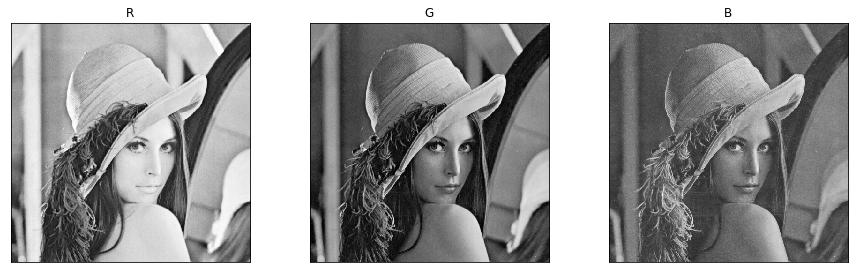

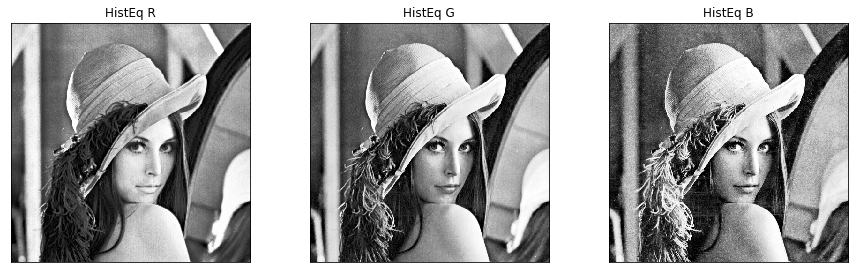

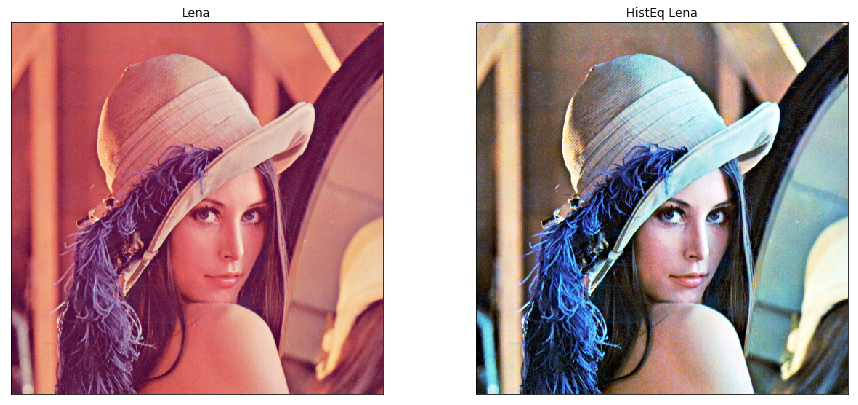

In [5]:
lena_color = mpimg.imread('../img/lena_color.png')

# extract channels
single_channel_r = lena_color[:,:,0] 
single_channel_g = lena_color[:,:,1] 
single_channel_b = lena_color[:,:,2] 

# display channels
fig, ax = plt.subplots(1, 3, figsize=(15,15),
 subplot_kw={'aspect':'equal', 'xticklabels':[], 'yticklabels':[], 'xticks': [], 'yticks': []}, 
 gridspec_kw = {'wspace':0.25, 'hspace':0.25})
ax[0].imshow(single_channel_r, cmap='gray')
ax[0].set_title('R')
ax[1].imshow(single_channel_g, cmap='gray')
ax[1].set_title('G')
ax[2].imshow(single_channel_b, cmap='gray')
ax[2].set_title('B')

outR,_,_ = histeq(single_channel_r*255)
outG,_,_ = histeq(single_channel_g*255)
outB,_,_ = histeq(single_channel_b*255)

fig, ax = plt.subplots(1, 3, figsize=(15,15),
 subplot_kw={'aspect':'equal', 'xticklabels':[], 'yticklabels':[], 'xticks': [], 'yticks': []}, 
 gridspec_kw = {'wspace':0.25, 'hspace':0.25})
ax[0].set_title('HistEq R')
ax[0].imshow(outR, cmap='gray')
ax[1].set_title('HistEq G')
ax[1].imshow(outG, cmap='gray')
ax[2].set_title('HistEq B')
ax[2].imshow(outB, cmap='gray')

# combine channels
out_img = np.zeros(lena_color.shape)
out_img[:,:,0] = outR
out_img[:,:,1] = outG
out_img[:,:,2] = outB
out_img = out_img/255
fig, ax = plt.subplots(1, 2, figsize=(15,15),
 subplot_kw={'aspect':'equal', 'xticklabels':[], 'yticklabels':[], 'xticks': [], 'yticks': []}, 
 gridspec_kw = {'wspace':0.25, 'hspace':0.25})
ax[0].imshow(lena_color)
ax[0].set_title('Lena')
ax[1].imshow(out_img)
ax[1].set_title('HistEq Lena')